# This file contains function to generate n-dimention shells.

In [0]:
##mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import csv

In [0]:
base_path = '/content/drive/My Drive/DL_exp/'

In [0]:
### visualize data points 

# Input: (n,3) numpy array for data points and (n,1) numpy array for labels (values: 0 or 1)
def plot_3D_data(points,labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[np.where(labels == 1)[0],0],points[np.where(labels == 1)[0],1],points[np.where(labels == 1)[0],2])
    ax.scatter(points[np.where(labels == 0)[0],0],points[np.where(labels == 0)[0],1],points[np.where(labels == 0)[0],2])
    plt.show()

# Input: (n,2) numpy array for data points and (n,1) numpy array for labels (values: 0 or 1)
def plot_2D_data(points,labels):
    plt.scatter(points[np.where(labels == 1)[0],0],points[np.where(labels == 1)[0],1])
    plt.scatter(points[np.where(labels == 0)[0],0],points[np.where(labels == 0)[0],1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

* Shell Data can have k n-dimension shells of different radius and thickness. 
* A shell is generated by a direction chosen uniformly at random and a norm drawn uniformly at random from the interval [radius_of_shell-thickness_of_shell/2), radius_of_shell+(thickness_of_shell/2)].

##### Input : 
* points_dim : dimension of shell (integer number)
* num_samples : number of samples (integer number)
* radius_of_shell : list of radius of k shells (list of k elements)
* thickness_of_shell : list of thickness of k shells (list of k elements)
* label_of_shell : list of label of k shells (list of k elements)

##### Output :
* return geterated data numpy array of (n X (d+1)) dimension. 
where, n is numer of samples and d is shell dimension. Last column is label.

In [0]:
def shell_data(num_samples,points_dim,radius_of_shell,thickness_of_shell,label_of_shell):
  # generate points on circle of unit radius 
  np.random.seed(111)
  a = np.random.uniform(-1.0, 1.0, (num_samples,points_dim))
  norm = np.sqrt(np.sum(np.square(a),axis=1))
  unit_circle = a/norm[:,None]
  
  multiplier_with_label = np.empty((num_samples,2))
  n = int(num_samples/len(radius_of_shell))
  
  # move point by multiplying it with scalar
  for i in range(len(radius_of_shell)):
    multiplier = np.random.uniform(radius_of_shell[i]-(thickness_of_shell[i]/2), radius_of_shell[i]+(thickness_of_shell[i]/2), (n,1))
    label = np.full((n,1),label_of_shell[i])
    multiplier_with_label[i*n:(i+1)*n,:] = np.concatenate((multiplier,label), axis=1)
  multiplier = np.random.uniform(radius_of_shell[0]-(thickness_of_shell[0]/2), radius_of_shell[0]+(thickness_of_shell[0]/2), (num_samples-(n*len(radius_of_shell)),1))
  label = np.full((num_samples-(n*len(radius_of_shell)),1),label_of_shell[0])
  multiplier_with_label[n*len(radius_of_shell):num_samples,:] = np.concatenate((multiplier,label), axis=1)

  np.random.shuffle(multiplier_with_label)

  gendata = unit_circle*multiplier_with_label[:,0:1]
  data = np.concatenate((gendata,multiplier_with_label[:,1:2]), axis=1)

  return data


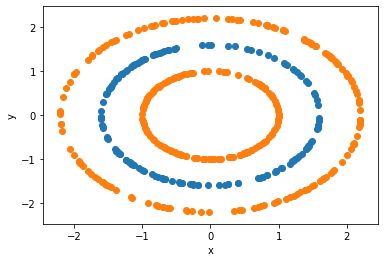

In [0]:
points_dim = 2
num_samples = 500
radius_of_shell=[1,1.6,2.2]
thickness_of_shell = [0,0,0]
label_of_shell = [0,1,0]

data = shell_data(num_samples,points_dim,radius_of_shell,thickness_of_shell,label_of_shell)
plot_2D_data(data[:,:-1],data[:,-1])

#path to csv file to store generated data
# csv_path = base_path+'shell_shell_data_version1/train_in'+ str(radius_of_inner_shell) + '_out'+ str(radius_of_outer_shell) + '_t' + str(thickness_of_shell)+ '_' + str(points_dim) + 'dim.csv'     
# with open(csv_path, 'w') as writeFile:
#     writer = csv.writer(writeFile)
#     header = ["c"+str(i) for i in range(points_dim)]
#     header.append("label")
#     writer.writerow(header)
#     writer.writerows(data)